# PRETSA BINARY: PRETSA method extension using a binary search

## Framework setup

In [1]:
!git clone https://github.com/cmalvr/PRETSA

Cloning into 'PRETSA'...
remote: Enumerating objects: 633, done.
remote: Counting objects: 100% (56/56), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 633 (delta 29), reused 33 (delta 14), pack-reused 577 (from 1)
Receiving objects: 100% (633/633), 11.52 MiB | 32.96 MiB/s, done.
Resolving deltas: 100% (396/396), done.


In [2]:
!pip install -r /content/PRETSA/requirements.txt

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 25.2 MB/s eta 0:00:00
  Created wheel for anytree: filename=anytree-2.4.3-py2.py3-none-any.whl size=26707 sha256=3fb65e22439a447d40245e28935033e50c37b23c4a111a5129a923ca638973a3
  Stored in directory: /root/.cache/pip/wheels/f3/d3/8f/9eea88a7fe27ca18e7ebfc23e1012514c8b13a4552aa43be12
  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26097 sha256=0c06f960f7d6e8bcb264d3ca673916074f4a7ea2270e2af0d9a2c48312842c89
  Stored in directory: /root/.cache/pip/wheels/31/d7/d9/eec6891f78cac19a693bd40ecb8365d2f4613318c145ec9816
Successfully built anytree intervaltree


## Loading datasets

In [3]:
!python /content/PRETSA/dataset_collection.py

/usr/local/lib/python3.11/dist-packages/cudf/utils/_ptxcompiler.py:64: UserWarning: Error getting driver and runtime versions:

stdout:



stderr:

Traceback (most recent call last):
  File "<string>", line 4, in <module>
  File "/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/cudadrv/driver.py", line 314, in __getattr__
    raise CudaSupportError("Error at driver init: \n%s:" %
numba.cuda.cudadrv.error.CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBA_CUDA_DRIVER
with the file path of the CUDA driver shared library.
:


Not patching Numba
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cudf/utils/gpu_utils.py:62: UserWarning: Failed to dlopen libcuda.so.1
  warnings.warn(str(e))
Downloaded: /content/PRETSA/downloads/CoSeLoG.xes.gz
Processing CoSeLoG...
parsing log, completed traces :: 100% 1434/1434 [00:00<00:00, 2978.38it/s]
Save

## Generating Durations: Sepsis and CoseLogs Datasets

In [4]:
# Generates all the original annotation duration for each of two datasets: CoSeLog and Sepsis
# Generates /content/PRETSA/original_annotation/ directory

!python /content/PRETSA/gc_add_annotations_duration.py

Processing: CoSeLoG
Writting: /content/PRETSA/original_annotation/CoSeLoG_duration.csv
Reading: /content/PRETSA/csv_outputs/CoSeLoG_dataset.csv
Processing: Sepsis
Writting: /content/PRETSA/original_annotation/Sepsis_duration.csv
Reading: /content/PRETSA/csv_outputs/Sepsis_dataset.csv


## User parameters

In [5]:
import json

k_values = json.dumps([4, 8, 16, 32, 64])
t_values = json.dumps([0.1, 0.25, 0.5, 0.75, 1.0])

## Run Pretsa: Generates Pretsa Log


In [6]:
# Generates: /content/PRETSA/pretsalog/ f"{dataset}_t{t}_k{k}_pretsa.csv"
# These contain the new annotations for duration after Running PRETSA method

!python /content/PRETSA/startExperimentsForJournalExtension_PRETSA.py "{k_values}" "{t_values}"

 Load Event Log: /content/PRETSA/original_annotation/Sepsis_duration.csv
Generated Distance Matrix
 Modified 827 cases for k=4, t=0.1
 Private event log saved at: /content/PRETSA/pretsalog/Sepsis_t0.1_k4_pretsa.csv
 Experiment metadata saved at: /content/PRETSA/pretsalog/Sepsis_t0.1_k4_pretsa.pickle
 Load Event Log: /content/PRETSA/original_annotation/Sepsis_duration.csv
Generated Distance Matrix
 Modified 770 cases for k=4, t=0.25
 Private event log saved at: /content/PRETSA/pretsalog/Sepsis_t0.25_k4_pretsa.csv
 Experiment metadata saved at: /content/PRETSA/pretsalog/Sepsis_t0.25_k4_pretsa.pickle
 Load Event Log: /content/PRETSA/original_annotation/Sepsis_duration.csv
Generated Distance Matrix
 Modified 762 cases for k=4, t=0.5
 Private event log saved at: /content/PRETSA/pretsalog/Sepsis_t0.5_k4_pretsa.csv
 Experiment metadata saved at: /content/PRETSA/pretsalog/Sepsis_t0.5_k4_pretsa.pickle
 Load Event Log: /content/PRETSA/original_annotation/Sepsis_duration.csv
Generated Distance Ma

## Run Pretsa Binary: Generates Pretsa Binary Log

In [7]:
# Generates: /content/PRETSA/pretsa_binarylog/ f"{dataset}_t{t}_k{k}_pretsa.csv"
# These contain the new annotations for duration after Running PRETSA method

!python /content/PRETSA/startExperimentsForJournalExtension_PRETSA_BINARY.py  "{k_values}" "{t_values}"

 Load Event Log: /content/PRETSA/original_annotation/CoSeLoG_duration.csv
Generated Distance Matrix
 Fixing K-Anonymity...
 Fixing T-closeness...
T-Closeness adjustments applied to 1 nodes.
T-Closeness logs saved: 1 adjustments recorded.
 Modified 99 cases for k=4, t=0.1
 Private event log saved at: /content/PRETSA/pretsa_binarylog/CoSeLoG_t0.1_k4_pretsa.csv
 Experiment metadata saved at: /content/PRETSA/pretsa_binarylog/CoSeLoG_t0.1_k4_pretsa.pickle
 Load Event Log: /content/PRETSA/original_annotation/CoSeLoG_duration.csv
Generated Distance Matrix
 Fixing K-Anonymity...
 Fixing T-closeness...
T-Closeness adjustments applied to 0 nodes.
 Modified 99 cases for k=4, t=0.25
 Private event log saved at: /content/PRETSA/pretsa_binarylog/CoSeLoG_t0.25_k4_pretsa.csv
 Experiment metadata saved at: /content/PRETSA/pretsa_binarylog/CoSeLoG_t0.25_k4_pretsa.pickle
 Load Event Log: /content/PRETSA/original_annotation/CoSeLoG_duration.csv
Generated Distance Matrix
 Fixing K-Anonymity...
 Fixing T-cl

## Run Baseline: Generate Baseline log

In [8]:
# Generates: /content/PRETSA/baselinelogs/ Path(filePath).name.replace(".csv","_pretsa_baseline_k%s_t%s.csv" % (kString,tString))
# These contain the new annotations for duration after Running BASELINE method
# Should generate same content as baselogs zip directory

!python /content/PRETSA/gc_generate_baseline_log.py

python3: can't open file '/content/generate_baseline_log.py': [Errno 2] No such file or directory
Traceback (most recent call last):
  File "/content/PRETSA/gc_generate_baseline_log.py", line 12, in <module>
    subprocess.run(["python", "generate_baseline_log.py", filePath, dataset, str(k), str(t)], check=True)
  File "/usr/lib/python3.11/subprocess.py", line 571, in run
    raise CalledProcessError(retcode, process.args,
subprocess.CalledProcessError: Command '['python', 'generate_baseline_log.py', '/content/PRETSA/original_annotation/CoSeLoG_duration.csv', 'CoSeLoG', '4', '[4, 8, 16, 32, 64]']' returned non-zero exit status 2.


## Calculate Annotation Errors and HeatMap visualization

 Relative error of the annotations for each activity versus the original annotations

In [9]:
%cd /content/PRETSA/

/content/PRETSA


Processing /content/PRETSA/original_annotation/CoSeLoG_duration.csv and /content/PRETSA/pretsalog/CoSeLoG_t1.0_k4_pretsa.csv for t=1.0, k=4
Processing /content/PRETSA/original_annotation/CoSeLoG_duration.csv and /content/PRETSA/pretsalog/CoSeLoG_t0.75_k16_pretsa.csv for t=0.75, k=16
Processing /content/PRETSA/original_annotation/CoSeLoG_duration.csv and /content/PRETSA/pretsalog/CoSeLoG_t0.5_k4_pretsa.csv for t=0.5, k=4
Processing /content/PRETSA/original_annotation/CoSeLoG_duration.csv and /content/PRETSA/pretsalog/CoSeLoG_t0.5_k64_pretsa.csv for t=0.5, k=64
Processing /content/PRETSA/original_annotation/CoSeLoG_duration.csv and /content/PRETSA/pretsalog/CoSeLoG_t0.75_k64_pretsa.csv for t=0.75, k=64
Processing /content/PRETSA/original_annotation/CoSeLoG_duration.csv and /content/PRETSA/pretsalog/CoSeLoG_t0.75_k8_pretsa.csv for t=0.75, k=8
Processing /content/PRETSA/original_annotation/CoSeLoG_duration.csv and /content/PRETSA/pretsalog/CoSeLoG_t0.1_k4_pretsa.csv for t=0.1, k=4
Processi

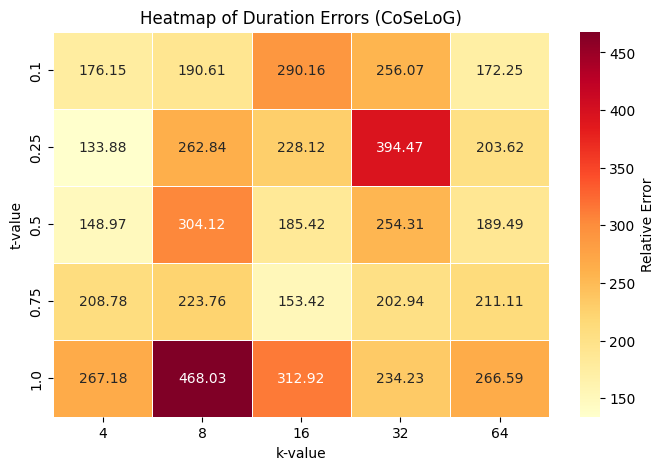

In [10]:
from calculateDurationDifferences import calculate_duration_differences
from mapDurationDifferences import generate_heatmap

# Replace with dataset name and method parameter
error_data = calculate_duration_differences("CoSeLoG", "default")
generate_heatmap("CoSeLoG", "default")

Processing /content/PRETSA/original_annotation/CoSeLoG_duration.csv and /content/PRETSA/pretsa_binarylog/CoSeLoG_t1.0_k4_pretsa.csv for t=1.0, k=4
Processing /content/PRETSA/original_annotation/CoSeLoG_duration.csv and /content/PRETSA/pretsa_binarylog/CoSeLoG_t0.75_k16_pretsa.csv for t=0.75, k=16
Processing /content/PRETSA/original_annotation/CoSeLoG_duration.csv and /content/PRETSA/pretsa_binarylog/CoSeLoG_t0.5_k4_pretsa.csv for t=0.5, k=4
Processing /content/PRETSA/original_annotation/CoSeLoG_duration.csv and /content/PRETSA/pretsa_binarylog/CoSeLoG_t0.5_k64_pretsa.csv for t=0.5, k=64
Processing /content/PRETSA/original_annotation/CoSeLoG_duration.csv and /content/PRETSA/pretsa_binarylog/CoSeLoG_t0.75_k64_pretsa.csv for t=0.75, k=64
Processing /content/PRETSA/original_annotation/CoSeLoG_duration.csv and /content/PRETSA/pretsa_binarylog/CoSeLoG_t0.75_k8_pretsa.csv for t=0.75, k=8
Processing /content/PRETSA/original_annotation/CoSeLoG_duration.csv and /content/PRETSA/pretsa_binarylog/C

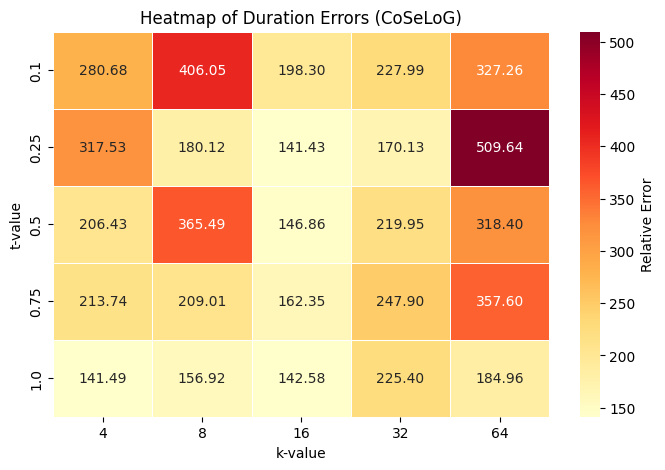

In [11]:
# Replace with dataset name and method parameter
error_data = calculate_duration_differences("CoSeLoG", "binary")
generate_heatmap("CoSeLoG", "binary")

Processing /content/PRETSA/original_annotation/Sepsis_duration.csv and /content/PRETSA/pretsalog/Sepsis_t0.75_k8_pretsa.csv for t=0.75, k=8
Processing /content/PRETSA/original_annotation/Sepsis_duration.csv and /content/PRETSA/pretsalog/Sepsis_t0.1_k16_pretsa.csv for t=0.1, k=16
Processing /content/PRETSA/original_annotation/Sepsis_duration.csv and /content/PRETSA/pretsalog/Sepsis_t1.0_k64_pretsa.csv for t=1.0, k=64
Processing /content/PRETSA/original_annotation/Sepsis_duration.csv and /content/PRETSA/pretsalog/Sepsis_t0.5_k4_pretsa.csv for t=0.5, k=4
Processing /content/PRETSA/original_annotation/Sepsis_duration.csv and /content/PRETSA/pretsalog/Sepsis_t0.5_k16_pretsa.csv for t=0.5, k=16
Processing /content/PRETSA/original_annotation/Sepsis_duration.csv and /content/PRETSA/pretsalog/Sepsis_t0.5_k32_pretsa.csv for t=0.5, k=32
Processing /content/PRETSA/original_annotation/Sepsis_duration.csv and /content/PRETSA/pretsalog/Sepsis_t1.0_k32_pretsa.csv for t=1.0, k=32
Processing /content/PR

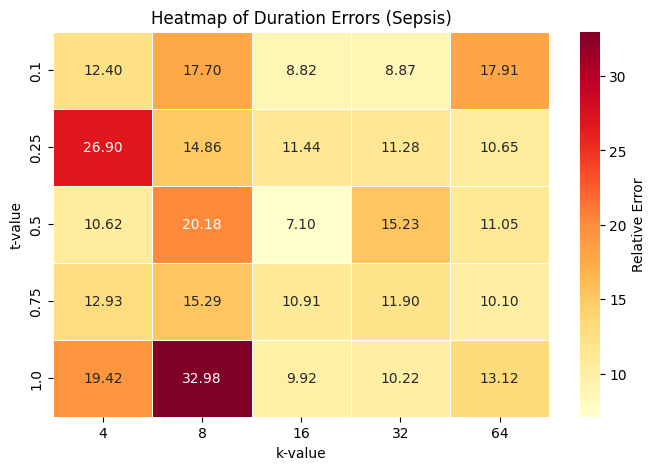

In [12]:
# Replace with dataset name and method parameter
error_data = calculate_duration_differences("Sepsis", "default")
generate_heatmap("Sepsis", "default")

Processing /content/PRETSA/original_annotation/Sepsis_duration.csv and /content/PRETSA/pretsa_binarylog/Sepsis_t0.75_k8_pretsa.csv for t=0.75, k=8
Processing /content/PRETSA/original_annotation/Sepsis_duration.csv and /content/PRETSA/pretsa_binarylog/Sepsis_t0.1_k16_pretsa.csv for t=0.1, k=16
Processing /content/PRETSA/original_annotation/Sepsis_duration.csv and /content/PRETSA/pretsa_binarylog/Sepsis_t1.0_k64_pretsa.csv for t=1.0, k=64
Processing /content/PRETSA/original_annotation/Sepsis_duration.csv and /content/PRETSA/pretsa_binarylog/Sepsis_t0.5_k4_pretsa.csv for t=0.5, k=4
Processing /content/PRETSA/original_annotation/Sepsis_duration.csv and /content/PRETSA/pretsa_binarylog/Sepsis_t0.5_k16_pretsa.csv for t=0.5, k=16
Processing /content/PRETSA/original_annotation/Sepsis_duration.csv and /content/PRETSA/pretsa_binarylog/Sepsis_t0.5_k32_pretsa.csv for t=0.5, k=32
Processing /content/PRETSA/original_annotation/Sepsis_duration.csv and /content/PRETSA/pretsa_binarylog/Sepsis_t1.0_k32_

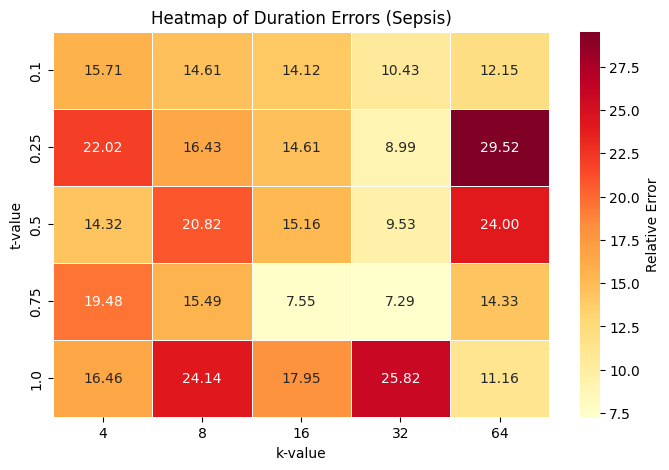

In [15]:
# Replace with dataset name and method parameter
error_data = calculate_duration_differences("Sepsis", "binary")
generate_heatmap("Sepsis", "binary")